100%|██████████████████████████████████████████████████████████████████████████████| 998/998 [00:00<00:00, 6784.28it/s]


<IPython.core.display.Javascript object>


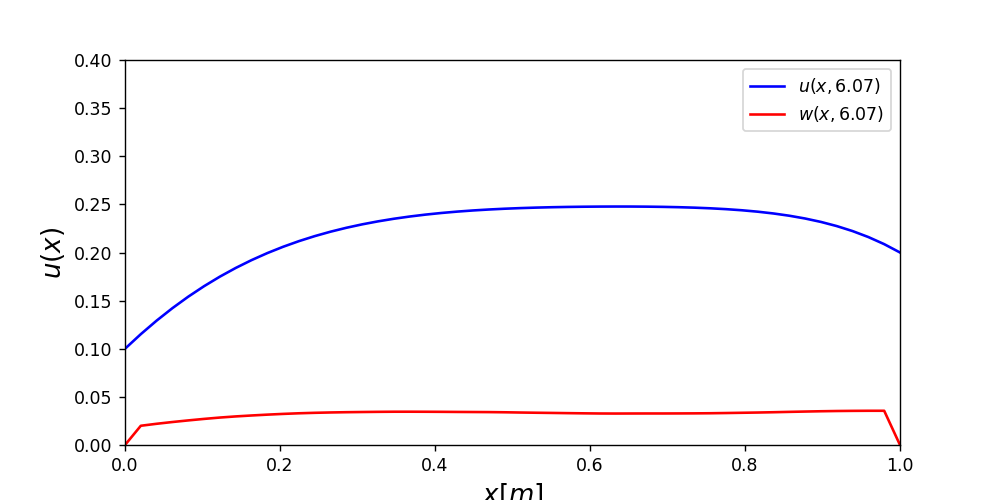

In [53]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from tqdm import tqdm
import random

Nx = 50
Nt = 1000
x = np.linspace(0.,1.,Nx)
t = np.linspace(0.,10.,Nt)

dt = t[1] - t[0]
dx = x[1] - x[0]

a = 0.2
b = 0.3
epsilon = 0.03
D = 0.01

lambda_ = D*dt/ (dx**2)

def ui(x):
    return random.uniform(0., 0.3)

def InitT():
    u = np.zeros((Nt,Nx))
    for i in range(0,Nx):
        u[0,i] = ui(x)
    u[:,0] = 0.1
    u[:,-1] = 0.2
    return u

u = InitT()
w = np.zeros((Nt,Nx))

def GetSolution():
    for l in tqdm(range(1,len(t)-1)):
        
        for i in range(1,len(x)-1):
            w_presente = w[l-1,i]
            u[l, i] = u[l-1, i] + lambda_ * (u[l-1, i+1] - 2*u[l-1, i] + u[l-1, i-1]) - dt * u[l-1, i] * (u[l-1, i] - a) * (1 - u[l-1, i]) + dt * w_presente
            w[l,i] = w_presente + dt*epsilon*(u[l,i]-b*w_presente)
GetSolution()

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,1,1)


def init():
    ax.set_xlim(x[0],x[-1])
    ax.set_ylim(0,0.4)
    ax.set_xlabel(r'$x[m]$', fontsize=15)
    ax.set_ylabel(r'$u(x)$', fontsize=15)

def Update(i):
    ax.clear()
    init()
    ax.plot(x,u[i,:], '-' ,color='b', label=r'$u(x,%.2f)$' %(t[i]))
    ax.plot(x,w[i,:], '-' ,color='r', label=r'$w(x,%.2f)$' %(t[i]))
    plt.legend(loc=0)

Animation = animation.FuncAnimation(fig, Update, frames=Nt, init_func=init)
plt.show()


Puntos donde la neurona se activa.

In [57]:
for i in range(Nt):
    for j in range(Nx):
        if u[i,j] >= 0.3:
            print(t[i],x[j],i,j)

8.328328328328329 0.5510204081632653 832 27
8.328328328328329 0.5714285714285714 832 28
8.328328328328329 0.5918367346938775 832 29
8.338338338338339 0.5510204081632653 833 27
8.338338338338339 0.5714285714285714 833 28
8.338338338338339 0.5918367346938775 833 29
8.338338338338339 0.6122448979591836 833 30
8.348348348348349 0.5306122448979591 834 26
8.348348348348349 0.5510204081632653 834 27
8.348348348348349 0.5714285714285714 834 28
8.348348348348349 0.5918367346938775 834 29
8.348348348348349 0.6122448979591836 834 30
8.358358358358359 0.5306122448979591 835 26
8.358358358358359 0.5510204081632653 835 27
8.358358358358359 0.5714285714285714 835 28
8.358358358358359 0.5918367346938775 835 29
8.358358358358359 0.6122448979591836 835 30
8.358358358358359 0.6326530612244897 835 31
8.368368368368369 0.5306122448979591 836 26
8.368368368368369 0.5510204081632653 836 27
8.368368368368369 0.5714285714285714 836 28
8.368368368368369 0.5918367346938775 836 29
8.368368368368369 0.612244897959